In [4]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [5]:
def alg2(G, k):
    R = [i for i in range(len(G[0]))]
    X = []
    x_ = 0
    for i in range(k):
        prod = 1
        for a in range(len(G)):
            prod *= G[a][0] + 1
        max_good = (R[0], prod)
        for j in range(1, len(R)):
            prod = 1
            for a in range(len(G)):
                prod *= G[a][R[j]] + 1
            if max_good[1] < prod:
                max_good = (R[j], prod)
        
        R.remove(max_good[0])
        X.append(max_good[0])

    return X


In [6]:
def AlgGreedy(G, k):
    n = len(G)
    r = k // n
    allocs = []
    for i in range(n):
        allocs.append(Maximize(G[i], r))
    all_alloc = allocs[0]
    
    for i in range(len(allocs)):
        all_alloc = list(set(all_alloc) | set(allocs[i]))
        
    return all_alloc

In [7]:
def Maximize(arr, k):
    if k >= len(arr):
        return list(range(len(arr)))

    min_heap = []

    for index, value in enumerate(arr):
        if len(min_heap) < k:
            heapq.heappush(min_heap, (value, index))
        elif value > min_heap[0][0]:
            heapq.heapreplace(min_heap, (value, index))

    indices = [index for _, index in min_heap]

    return indices

In [8]:
def nw(goods, rows, cols):
    mask = [0] * cols

    for i in range(len(goods)):
        mask[goods[i]] = 1

    mask = np.asarray(mask)

    nsw = 1
    for agent in range(rows):
        nsw = nsw * (np.dot(mask, array_2d[agent]) + 1)

    nsw = nsw ** (1/rows)
    return nsw

In [9]:
nw1 = []
nw2 = []
for _ in range(1000):
    rows = 10
    cols = 25
    array_2d = np.random.randint(5, size=(rows, cols))
    goods2 = alg2(array_2d, 11)
    goods1 = AlgGreedy(array_2d, 11)
    
    nw1.append(nw(goods1, rows, cols))
    nw2.append(nw(goods2, rows, cols))

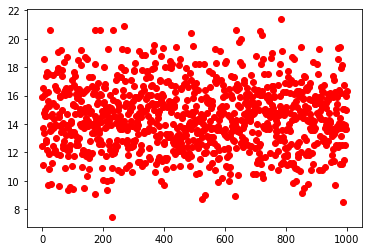

In [10]:
tmp = [0] * len(nw1)
for i in range(len(tmp)):
    tmp[i] = i
plt.scatter(tmp,nw1, color='red')

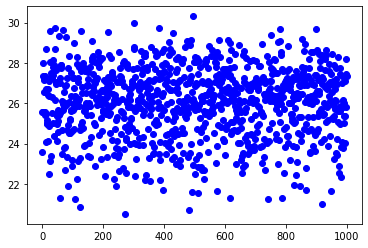

In [24]:
plt.scatter(tmp, nw2, color='blue')
plt.show()


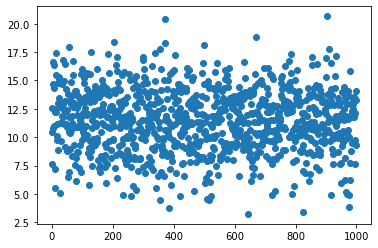

In [19]:
np_nw2 = np.array(nw2)
np_nw1 = np.array(nw1)
plt.scatter(tmp, (np_nw2-np_nw1))

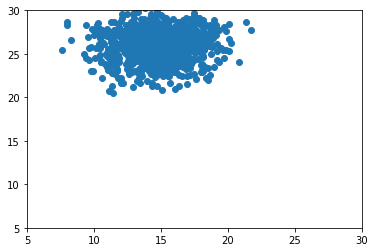

In [26]:
plt.scatter(nw1, nw2)
plt.axis([5, 30, 5, 30]) 
plt.show()